<a href="https://colab.research.google.com/github/rushil1510/BTP/blob/main/BTP_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uploading the datasheet onto colab

In [2]:
from google.colab import files

# Upload the Excel file
uploaded = files.upload()

Saving datasheet.xlsx to datasheet.xlsx


In [3]:
import pandas as pd

# Get the uploaded file name
file_name = list(uploaded.keys())[0]

# Load the Excel file into a DataFrame (first sheet by default)
df = pd.read_excel(file_name)

# Display the first few rows of the DataFrame
print(df.head())


   CH4  C3H8   Equivalence_Ratio   Compression Pressure(atm)  \
0  1.0   0.0                 0.5                           1   
1  1.0   0.0                 0.5                           1   
2  1.0   0.0                 0.5                           1   
3  1.0   0.0                 0.5                           1   
4  1.0   0.0                 0.5                           1   

    Compression Temperature(K)   1000/T_(1/K)   Ignition_time(sec)  \
0                     700.0000       1.428571                  0.0   
1                     708.0808       1.412268                  0.0   
2                     716.1616       1.396333                  0.0   
3                     724.2424       1.380753                  0.0   
4                     732.3232       1.365517                  0.0   

   Unnamed: 7  Unnamed: 8 Unnamed: 9  
0         NaN         NaN        NaN  
1         NaN         NaN        NaN  
2         NaN         NaN        NaN  
3         NaN         NaN        NaN  

In [4]:
df = df.iloc[:, :-3]

Cleaning up the data

In [5]:
df.describe()
print(df.shape)
print(df.dtypes)
df.columns = ['x', 'y','phi','p','T','1000/T','idt']
print(df.columns)
df = df[df['p'] != 10].reset_index(drop=True)

(1400, 7)
CH4                            float64
C3H8                           float64
 Equivalence_Ratio             float64
 Compression Pressure(atm)       int64
 Compression Temperature(K)    float64
 1000/T_(1/K)                  float64
 Ignition_time(sec)            float64
dtype: object
Index(['x', 'y', 'phi', 'p', 'T', '1000/T', 'idt'], dtype='object')


Data preprocessing

In [6]:
import numpy as np
df['phi'] = df['phi'].replace(np.nan, 0.5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 53837.9453 - val_loss: 1591.6544
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 54416.9023 - val_loss: 2660.5269
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 37289.8086 - val_loss: 2614.6995
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 45445.6758 - val_loss: 2757.0940
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 59678.1680 - val_loss: 2593.5444
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 39978.8984 - val_loss: 2213.8210
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 55459.8359 - val_loss: 2772.8833
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39578.3477 - val_loss: 2636.7678
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 63769.8320 - val_loss: 2684.3921
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 50879.3633 - val_loss: 2129.9177
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 49036.4062 - v

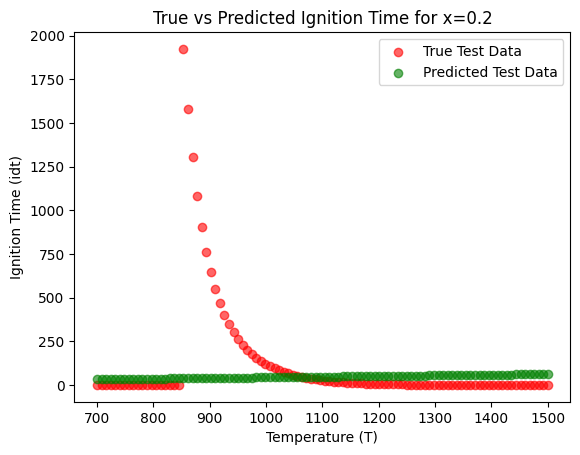

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# 1. Split data based on `x` value
train_df = df[df['x'] != 0.2]  # All rows where x is not 0.2
test_df = df[df['x'] == 0.2]   # All rows where x is 0.2

# Separate features and target
X_train = train_df.drop(columns=['idt']).values
y_train = train_df['idt'].values
X_test = test_df.drop(columns=['idt']).values
y_test = test_df['idt'].values

# 2. Define and train the model using only the training set
model_tf = Sequential([
    Dense(16, input_shape=(6,), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)  # Output layer
])

# Compile and train the model
model_tf.compile(optimizer='adam', loss='mse')
model_tf.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# 3. Predict `idt` values for the test set
test_predictions = model_tf.predict(X_test)

# 4. Plot actual vs predicted `idt` values for test data
# Extract temperature from test data for plotting (assuming T is the 5th column)
T_test = X_test[:, 4]  # Replace 4 if `T` is in a different column

plt.scatter(T_test, y_test, color='red', label='True Test Data', alpha=0.6)
plt.scatter(T_test, test_predictions, color='green', label='Predicted Test Data', alpha=0.6)

plt.xlabel('Temperature (T)')
plt.ylabel('Ignition Time (idt)')
plt.title('True vs Predicted Ignition Time for x=0.2')
plt.legend()
plt.show()


In [8]:
# Flatten test_predictions to a 1D array for easier comparison
test_predictions_flat = test_predictions.flatten()

# Calculate the difference between actual and predicted values
differences = y_test - test_predictions_flat

# Create a DataFrame to display all relevant information side by side
comparison_df = pd.DataFrame({
    'x': test_df['x'].values,
    'y': test_df['y'].values,
    'phi': test_df['phi'].values,
    'T': test_df['T'].values,
    'Actual idt': y_test,
    'Predicted idt': test_predictions_flat,
    'Difference': differences
})

# Print the comparison DataFrame
print(comparison_df)

      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5   700.0000    0.000000      32.090973  -32.090973
1   0.2  0.8  0.5   708.0808    0.000000      32.384678  -32.384678
2   0.2  0.8  0.5   716.1616    0.000000      32.678825  -32.678825
3   0.2  0.8  0.5   724.2424    0.000000      32.973316  -32.973316
4   0.2  0.8  0.5   732.3232    0.000000      33.268143  -33.268143
..  ...  ...  ...        ...         ...            ...         ...
95  0.2  0.8  0.5  1467.6770    0.101726      60.850319  -60.748593
96  0.2  0.8  0.5  1475.7580    0.092517      61.157524  -61.065007
97  0.2  0.8  0.5  1483.8380    0.085224      61.464672  -61.379448
98  0.2  0.8  0.5  1491.9190    0.077683      61.771885  -61.694202
99  0.2  0.8  0.5  1500.0000    0.071486      62.079163  -62.007677

[100 rows x 7 columns]


In [9]:
comparison_df

,x,y,phi,T,Actual idt,Predicted idt,Difference
0,0.2,0.8,0.5,700.0000,0.000000,32.090973,-32.090973
1,0.2,0.8,0.5,708.0808,0.000000,32.384678,-32.384678
2,0.2,0.8,0.5,716.1616,0.000000,32.678825,-32.678825
3,0.2,0.8,0.5,724.2424,0.000000,32.973316,-32.973316
4,0.2,0.8,0.5,732.3232,0.000000,33.268143,-33.268143
...,...,...,...,...,...,...,...
95,0.2,0.8,0.5,1467.6770,0.101726,60.850319,-60.748593
96,0.2,0.8,0.5,1475.7580,0.092517,61.157524,-61.065007
97,0.2,0.8,0.5,1483.8380,0.085224,61.464672,-61.379448
98,0.2,0.8,0.5,1491.9190,0.077683,61.771885,-61.694202


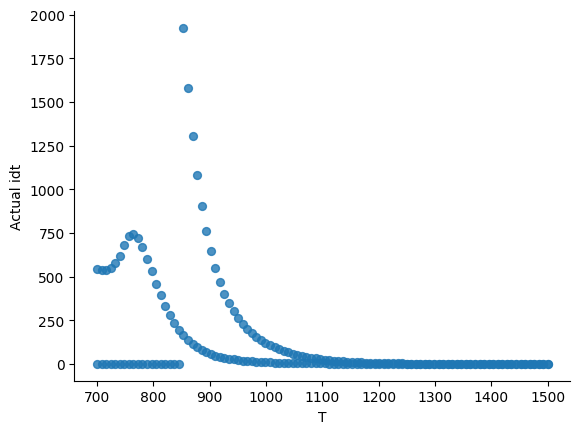

In [13]:
# @title T vs Actual idt

from matplotlib import pyplot as plt
comparison_df.plot(kind='scatter', x='T', y='Actual idt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

We see that when we feed a new isolated value of x (and ofcourse a corresponding temperature series) into the model, it makes some terrible predictions and is unable to understand any trends.


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 100681.8594 - val_loss: 142387.7344
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34600.7539 - val_loss: 152022.3750
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48702.5391 - val_loss: 147240.7031
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 57353.2656 - val_loss: 146641.8594
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39492.1875 - val_loss: 147224.9062
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 52633.2188 - val_loss: 146678.4062
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 57872.6484 - val_loss: 147379.5156
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 59321.7461 - val_loss: 147547.9844
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 41618.7266 - val_loss: 146812.0781
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 37338.1758 - val_loss: 147263.5938
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37080.441

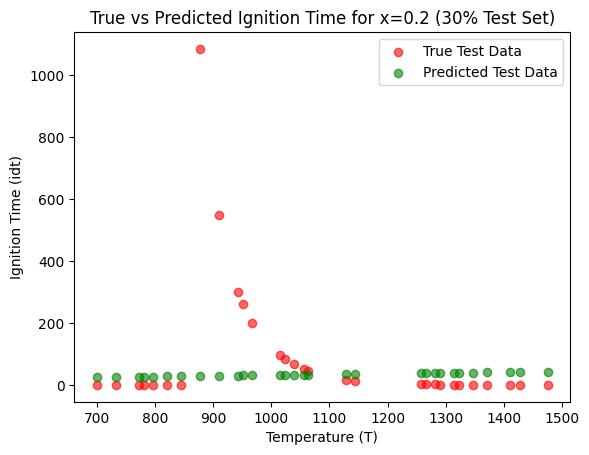

In [10]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd

# 1. Split the data where x == 0.2 into train and test subsets
df_x_02 = df[df['x'] == 0.2]
train_x_02, test_x_02 = train_test_split(df_x_02, test_size=0.3, random_state=42)  # 70% to train, 30% to test

# Combine the remaining data (where x != 0.2) with the 70% of x=0.2 data for training
train_df = pd.concat([df[df['x'] != 0.2], train_x_02])
test_df = test_x_02  # Test set with the remaining 30% of x=0.2 data

# Separate features and target
X_train = train_df.drop(columns=['idt']).values
y_train = train_df['idt'].values
X_test = test_df.drop(columns=['idt']).values
y_test = test_df['idt'].values

# 2. Define and train the model using only the new training set
model_tf = Sequential([
    Dense(16, input_shape=(6,), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)  # Output layer
])

# Compile and train the model
model_tf.compile(optimizer='adam', loss='mse')
model_tf.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# 3. Predict `idt` values for the test set
test_predictions = model_tf.predict(X_test)

# 4. Display values and comparisons in a DataFrame
test_predictions_flat = test_predictions.flatten()
differences = y_test - test_predictions_flat

# DataFrame showing x, y, phi, T, actual idt, predicted idt, and the difference
comparison_df = pd.DataFrame({
    'x': test_df['x'].values,
    'y': test_df['y'].values,
    'phi': test_df['phi'].values,
    'T': test_df['T'].values,
    'Actual idt': y_test,
    'Predicted idt': test_predictions_flat,
    'Difference': differences
})

# Print the comparison DataFrame
print(comparison_df)

# 5. Plot actual vs predicted idt values for test data
T_test = X_test[:, 4]  # Assuming T is the 5th column

plt.scatter(T_test, y_test, color='red', label='True Test Data', alpha=0.6)
plt.scatter(T_test, test_predictions_flat, color='green', label='Predicted Test Data', alpha=0.6)

plt.xlabel('Temperature (T)')
plt.ylabel('Ignition Time (idt)')
plt.title('True vs Predicted Ignition Time for x=0.2 (30% Test Set)')
plt.legend()
plt.show()


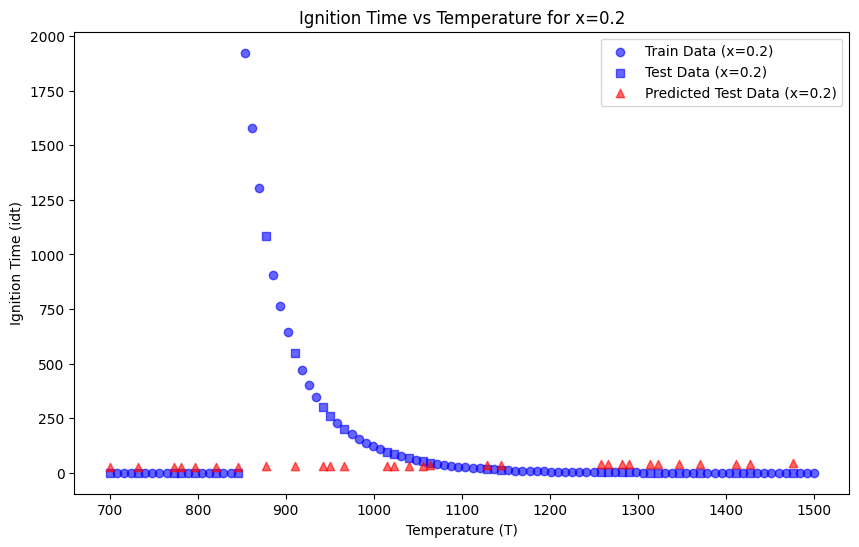

In [11]:
# Separate T and idt values for plotting
T_train = train_x_02['T'].values  # Temperature values for training data where x=0.2
idt_train = train_x_02['idt'].values

T_test = test_x_02['T'].values    # Temperature values for test data where x=0.2
idt_test = y_test                 # Actual idt values for test data
idt_pred = test_predictions_flat  # Predicted idt values for test data

plt.figure(figsize=(10, 6))

# Plot entire training set where x=0.2 (blue circles)
plt.scatter(T_train, idt_train, color='blue', marker='o', label='Train Data (x=0.2)', alpha=0.6)

# Plot test set where x=0.2 (blue triangles)
plt.scatter(T_test, idt_test, color='blue', marker='s', label='Test Data (x=0.2)', alpha=0.6)

# Plot predicted values for test data where x=0.2 (red squares)
plt.scatter(T_test, idt_pred, color='red', marker='^', label='Predicted Test Data (x=0.2)', alpha=0.6)

# Labels and title
plt.xlabel('Temperature (T)')
plt.ylabel('Ignition Time (idt)')
plt.title('Ignition Time vs Temperature for x=0.2')
plt.legend()
plt.show()


Very clearly the ANN is unable to predict the value of T at which the 'spike' is supposed to show up

Let's try this process for different values of x

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Results for x=0.2 with activation=relu:
      x    y  phi          T   Actual idt  Predicted idt   Difference
0   0.2  0.8  0.5  1370.7070     0.349734      60.024784   -59.675050
1   0.2  0.8  0.5  1128.2830    17.045730      50.221680   -33.175950
2   0.2  0.8  0.5  1265.6570     1.774779      55.769505   -53.994726
3   0.2  0.8  0.5  1063.6360    46.352820      47.619457    -1.266637
4   0.2  0.8  0.5  1055.5560    52.297860      47.294651     5.003209
5   0.2  0.8  0.5  1015.1520    95.165560      45.672306    49.493254
6   0.2  0.8  0.5   877.7778  1084.904000      40.181904  1044.722096
7   0.2  0.8  0.5  1346.4650     0.497977      59.041981   -58.544004
8   0.2  0.8  0.5   780.8081     0.000000      36.338760   -36.338760
9   0.2  0.8  0.5   700.0000     0.000000      33.165775   -33.165775
10  0.2  0.8  0.5   845.4545     0.000000      38.897297   -38.897297
11  0.2  0.8  0.5   942.4242   301.255500      42.760040   258.495460
12  0.2  0.8

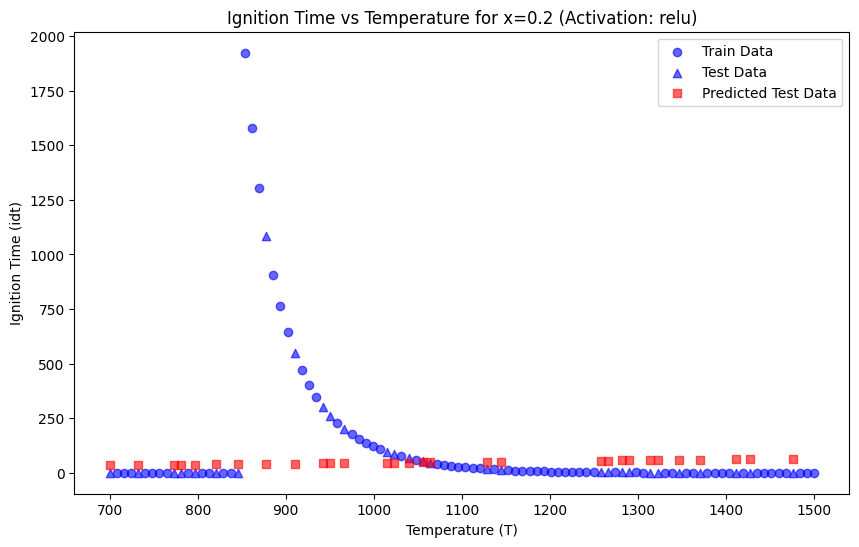

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Results for x=0.2 with activation=leaky_relu:
      x    y  phi          T   Actual idt  Predicted idt   Difference
0   0.2  0.8  0.5  1370.7070     0.349734      55.965694   -55.615960
1   0.2  0.8  0.5  1128.2830    17.045730      46.497334   -29.451604
2   0.2  0.8  0.5  1265.6570     1.774779      51.859833   -50.085054
3   0.2  0.8  0.5  1063.6360    46.352820      43.977215     2.375605
4   0.2  0.8  0.5  1055.5560    52.297860      43.662418     8.635442
5   0.2  0.8  0.5  1015.1520    95.165560      42.088959    53.076601
6   0.2  0.8  0.5   877.7778  1084.904000      36.749481  1048.154519
7   0.2  0.8  0.5  1346.4650     0.497977      55.017860   -54.519883
8   0.2  0.8  0.5   780.8081     0.000000      32.993439   -32.993439
9   0.2  0.8  0.5   700.0000     0.000000      29.875292   -29.875292
10  0.2  0.8  0.5   845.4545     0.000000      35.496040   -35.496040
11  0.2  0.8  0.5   942.4242   301.255500      39.259949   261.995551
12  0.

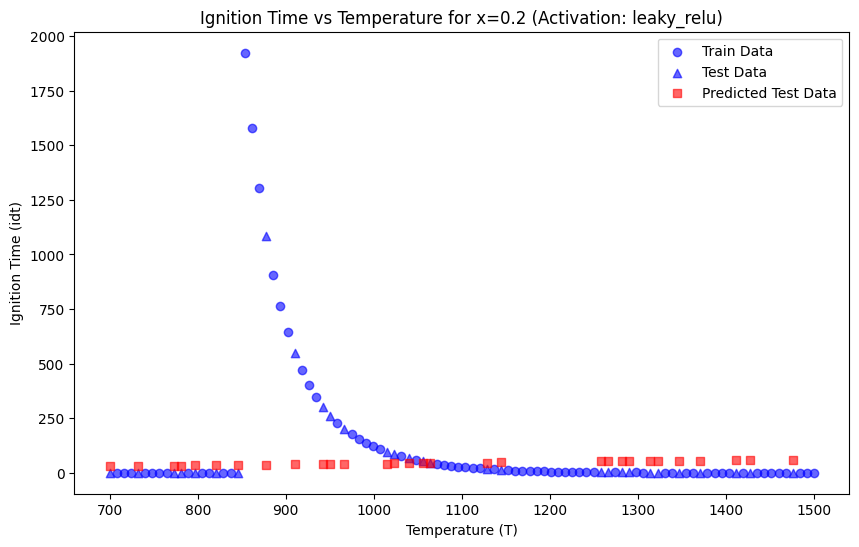

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Results for x=0.2 with activation=elu:
      x    y  phi          T   Actual idt  Predicted idt   Difference
0   0.2  0.8  0.5  1370.7070     0.349734      53.833294   -53.483560
1   0.2  0.8  0.5  1128.2830    17.045730      45.254128   -28.208398
2   0.2  0.8  0.5  1265.6570     1.774779      50.114658   -48.339879
3   0.2  0.8  0.5  1063.6360    46.352820      42.967983     3.384837
4   0.2  0.8  0.5  1055.5560    52.297860      42.682316     9.615544
5   0.2  0.8  0.5  1015.1520    95.165560      41.254040    53.911520
6   0.2  0.8  0.5   877.7778  1084.904000      36.401459  1048.502541
7   0.2  0.8  0.5  1346.4650     0.497977      52.975040   -52.477063
8   0.2  0.8  0.5   780.8081     0.000000      32.980587   -32.980587
9   0.2  0.8  0.5   700.0000     0.000000      30.133934   -30.133934
10  0.2  0.8  0.5   845.4545     0.000000      35.260677   -35.260677
11  0.2  0.8  0.5   942.4242   301.255500      38.684250   262.571250
12  0.2  0.8 

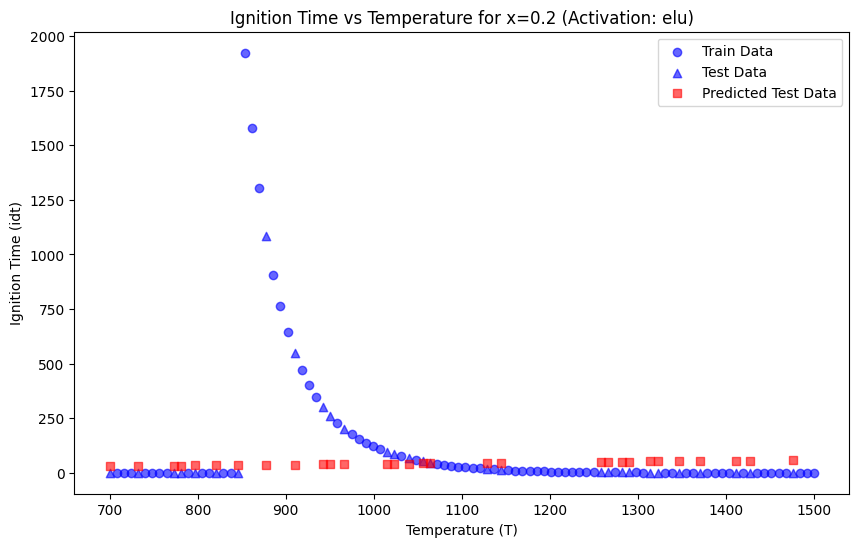

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Results for x=0.2 with activation=selu:
      x    y  phi          T   Actual idt  Predicted idt   Difference
0   0.2  0.8  0.5  1370.7070     0.349734      51.954975   -51.605241
1   0.2  0.8  0.5  1128.2830    17.045730      44.257622   -27.211892
2   0.2  0.8  0.5  1265.6570     1.774779      48.618938   -46.844159
3   0.2  0.8  0.5  1063.6360    46.352820      42.205845     4.146975
4   0.2  0.8  0.5  1055.5560    52.297860      41.949429    10.348431
5   0.2  0.8  0.5  1015.1520    95.165560      40.667362    54.498198
6   0.2  0.8  0.5   877.7778  1084.904000      36.310131  1048.593869
7   0.2  0.8  0.5  1346.4650     0.497977      51.185066   -50.687089
8   0.2  0.8  0.5   780.8081     0.000000      33.236668   -33.236668
9   0.2  0.8  0.5   700.0000     0.000000      30.677395   -30.677395
10  0.2  0.8  0.5   845.4545     0.000000      35.285400   -35.285400
11  0.2  0.8  0.5   942.4242   301.255500      38.360195   262.895305
12  0.2  0.8

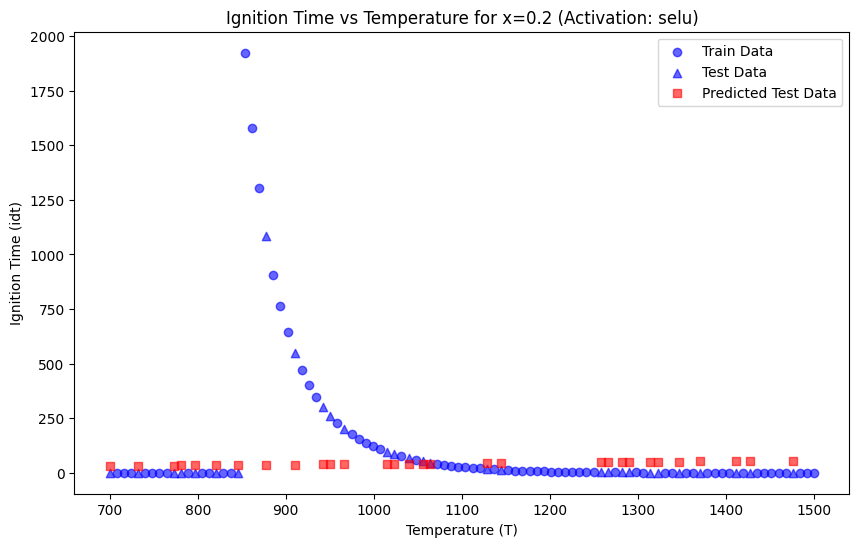

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Results for x=0.2 with activation=softplus:
      x    y  phi          T   Actual idt  Predicted idt   Difference
0   0.2  0.8  0.5  1370.7070     0.349734      59.105282   -58.755548
1   0.2  0.8  0.5  1128.2830    17.045730      49.686054   -32.640324
2   0.2  0.8  0.5  1265.6570     1.774779      55.014645   -53.239866
3   0.2  0.8  0.5  1063.6360    46.352820      47.188923    -0.836103
4   0.2  0.8  0.5  1055.5560    52.297860      46.877399     5.420461
5   0.2  0.8  0.5  1015.1520    95.165560      45.321636    49.843924
6   0.2  0.8  0.5   877.7778  1084.904000      40.063602  1044.840398
7   0.2  0.8  0.5  1346.4650     0.497977      58.160282   -57.662305
8   0.2  0.8  0.5   780.8081     0.000000      36.391830   -36.391830
9   0.2  0.8  0.5   700.0000     0.000000      33.368488   -33.368488
10  0.2  0.8  0.5   845.4545     0.000000      38.835274   -38.835274
11  0.2  0.8  0.5   942.4242   301.255500      42.531143   258.724357
12  0.2 

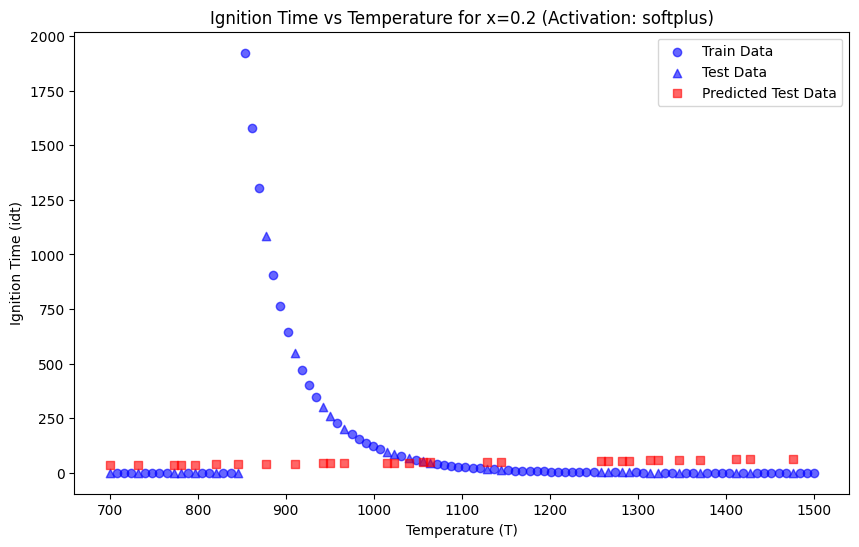

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Results for x=0.2 with activation=swish:
      x    y  phi          T   Actual idt  Predicted idt   Difference
0   0.2  0.8  0.5  1370.7070     0.349734      59.305801   -58.956067
1   0.2  0.8  0.5  1128.2830    17.045730      49.906219   -32.860489
2   0.2  0.8  0.5  1265.6570     1.774779      55.236877   -53.462098
3   0.2  0.8  0.5  1063.6360    46.352820      47.390068    -1.037248
4   0.2  0.8  0.5  1055.5560    52.297860      47.075134     5.222726
5   0.2  0.8  0.5  1015.1520    95.165560      45.498627    49.666933
6   0.2  0.8  0.5   877.7778  1084.904000      40.117294  1044.786706
7   0.2  0.8  0.5  1346.4650     0.497977      58.367065   -57.869088
8   0.2  0.8  0.5   780.8081     0.000000      36.303345   -36.303345
9   0.2  0.8  0.5   700.0000     0.000000      33.124077   -33.124077
10  0.2  0.8  0.5   845.4545     0.000000      38.846886   -38.846886
11  0.2  0.8  0.5   942.4242   301.255500      42.653687   258.601813
12  0.2  0.

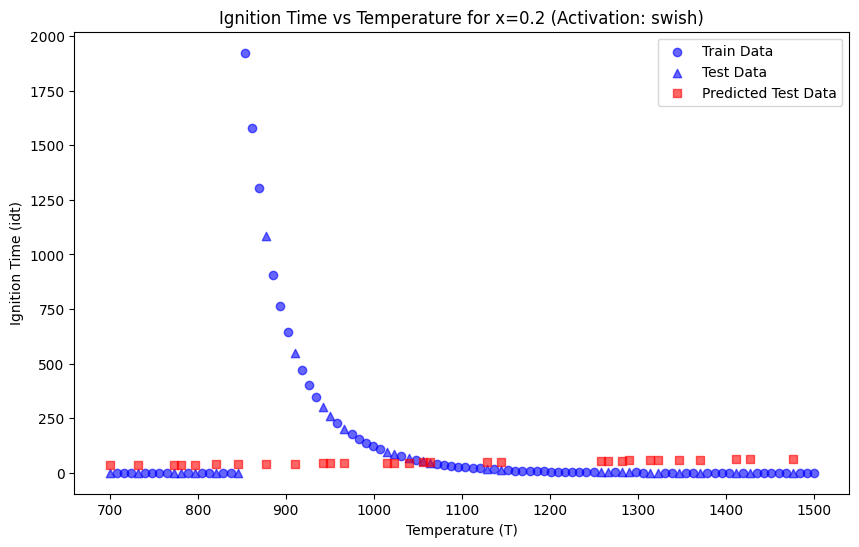

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Results for x=0.2 with activation=gelu:
      x    y  phi          T   Actual idt  Predicted idt   Difference
0   0.2  0.8  0.5  1370.7070     0.349734      48.870274   -48.520539
1   0.2  0.8  0.5  1128.2830    17.045730      41.133644   -24.087914
2   0.2  0.8  0.5  1265.6570     1.774779      45.510796   -43.736017
3   0.2  0.8  0.5  1063.6360    46.352820      39.081837     7.270983
4   0.2  0.8  0.5  1055.5560    52.297860      38.825848    13.472012
5   0.2  0.8  0.5  1015.1520    95.165560      37.547260    57.618300
6   0.2  0.8  0.5   877.7778  1084.904000      33.224365  1051.679635
7   0.2  0.8  0.5  1346.4650     0.497977      48.094204   -47.596227
8   0.2  0.8  0.5   780.8081     0.000000      30.203537   -30.203537
9   0.2  0.8  0.5   700.0000     0.000000      27.714195   -27.714195
10  0.2  0.8  0.5   845.4545     0.000000      32.214066   -32.214066
11  0.2  0.8  0.5   942.4242   301.255500      35.253414   266.002086
12  0.2  0.8

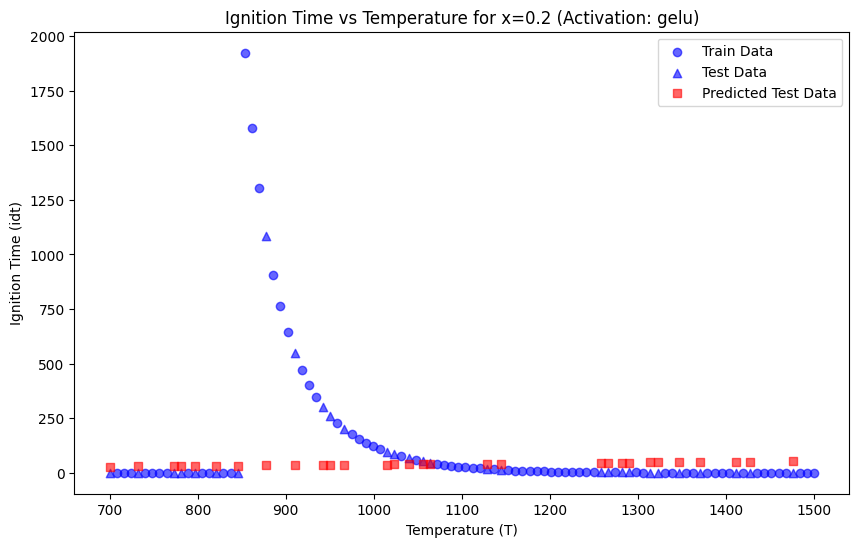

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Results for x=0.4 with activation=relu:
      x    y  phi          T   Actual idt  Predicted idt   Difference
0   0.4  0.6  0.5  1370.7070     0.372607      52.902504   -52.529897
1   0.4  0.6  0.5  1128.2830    18.768660      44.161751   -25.393091
2   0.4  0.6  0.5  1265.6570     1.889880      49.108986   -47.219106
3   0.4  0.6  0.5  1063.6360    52.229430      41.840492    10.388938
4   0.4  0.6  0.5  1055.5560    59.052790      41.550743    17.502047
5   0.4  0.6  0.5  1015.1520   108.036500      40.103188    67.933312
6   0.4  0.6  0.5   877.7778  1189.149000      35.202141  1153.946859
7   0.4  0.6  0.5  1346.4650     0.530350      52.026436   -51.496086
8   0.4  0.6  0.5   780.8081     0.000000      31.768639   -31.768639
9   0.4  0.6  0.5   700.0000     0.000000      28.931282   -28.931282
10  0.4  0.6  0.5   845.4545     0.000000      34.054787   -34.054787
11  0.4  0.6  0.5   942.4242   337.401800      37.503990   299.897810
12  0.4  0.6

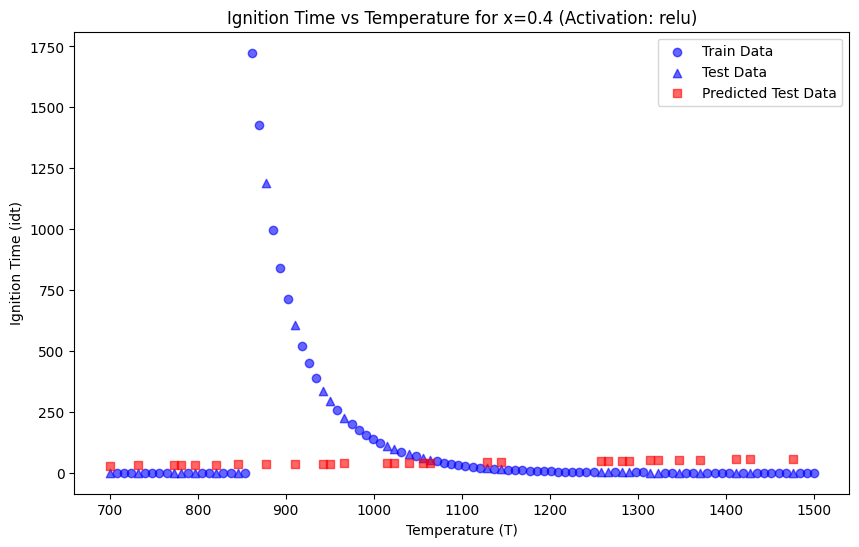

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Results for x=0.4 with activation=leaky_relu:
      x    y  phi          T   Actual idt  Predicted idt   Difference
0   0.4  0.6  0.5  1370.7070     0.372607      56.144146   -55.771539
1   0.4  0.6  0.5  1128.2830    18.768660      47.283165   -28.514505
2   0.4  0.6  0.5  1265.6570     1.889880      52.294807   -50.404927
3   0.4  0.6  0.5  1063.6360    52.229430      44.935905     7.293525
4   0.4  0.6  0.5  1055.5560    59.052790      44.643139    14.409651
5   0.4  0.6  0.5  1015.1520   108.036500      43.181370    64.855130
6   0.4  0.6  0.5   877.7778  1189.149000      38.245148  1150.903852
7   0.4  0.6  0.5  1346.4650     0.530350      55.254765   -54.724415
8   0.4  0.6  0.5   780.8081     0.000000      34.803261   -34.803261
9   0.4  0.6  0.5   700.0000     0.000000      31.973970   -31.973970
10  0.4  0.6  0.5   845.4545     0.000000      37.093159   -37.093159
11  0.4  0.6  0.5   942.4242   337.401800      40.560783   296.841017
12  0.

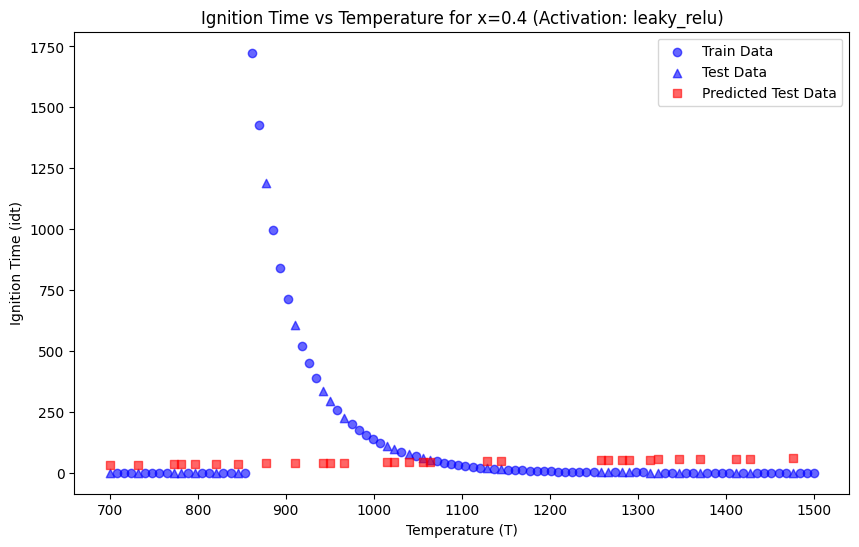

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Results for x=0.4 with activation=elu:
      x    y  phi          T   Actual idt  Predicted idt   Difference
0   0.4  0.6  0.5  1370.7070     0.372607      54.842545   -54.469938
1   0.4  0.6  0.5  1128.2830    18.768660      46.194481   -27.425821
2   0.4  0.6  0.5  1265.6570     1.889880      51.094681   -49.204801
3   0.4  0.6  0.5  1063.6360    52.229430      43.888939     8.340491
4   0.4  0.6  0.5  1055.5560    59.052790      43.600807    15.451983
5   0.4  0.6  0.5  1015.1520   108.036500      42.160065    65.876435
6   0.4  0.6  0.5   877.7778  1189.149000      37.262886  1151.886114
7   0.4  0.6  0.5  1346.4650     0.530350      53.977623   -53.447273
8   0.4  0.6  0.5   780.8081     0.000000      33.807770   -33.807770
9   0.4  0.6  0.5   700.0000     0.000000      30.930071   -30.930071
10  0.4  0.6  0.5   845.4545     0.000000      36.110992   -36.110992
11  0.4  0.6  0.5   942.4242   337.401800      39.567139   297.834661
12  0.4  0.6 

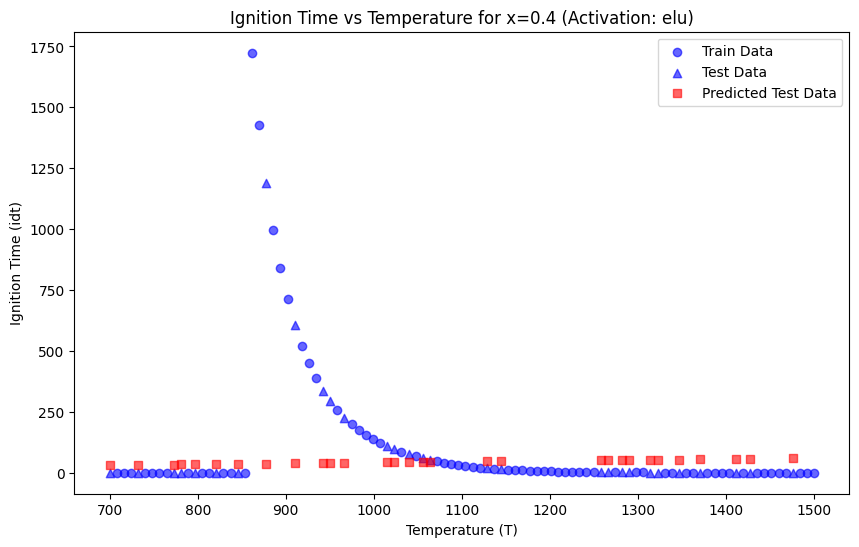

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Results for x=0.4 with activation=selu:
      x    y  phi          T   Actual idt  Predicted idt   Difference
0   0.4  0.6  0.5  1370.7070     0.372607      43.898418   -43.525811
1   0.4  0.6  0.5  1128.2830    18.768660      40.609890   -21.841230
2   0.4  0.6  0.5  1265.6570     1.889880      42.468174   -40.578294
3   0.4  0.6  0.5  1063.6360    52.229430      39.741421    12.488009
4   0.4  0.6  0.5  1055.5560    59.052790      39.633251    19.419539
5   0.4  0.6  0.5  1015.1520   108.036500      39.093357    68.943143
6   0.4  0.6  0.5   877.7778  1189.149000      37.276104  1151.872896
7   0.4  0.6  0.5  1346.4650     0.530350      43.567776   -43.037426
8   0.4  0.6  0.5   780.8081     0.000000      36.016422   -36.016422
9   0.4  0.6  0.5   700.0000     0.000000      34.987926   -34.987926
10  0.4  0.6  0.5   845.4545     0.000000      36.853634   -36.853634
11  0.4  0.6  0.5   942.4242   337.401800      38.127277   299.274523
12  0.4  0.6

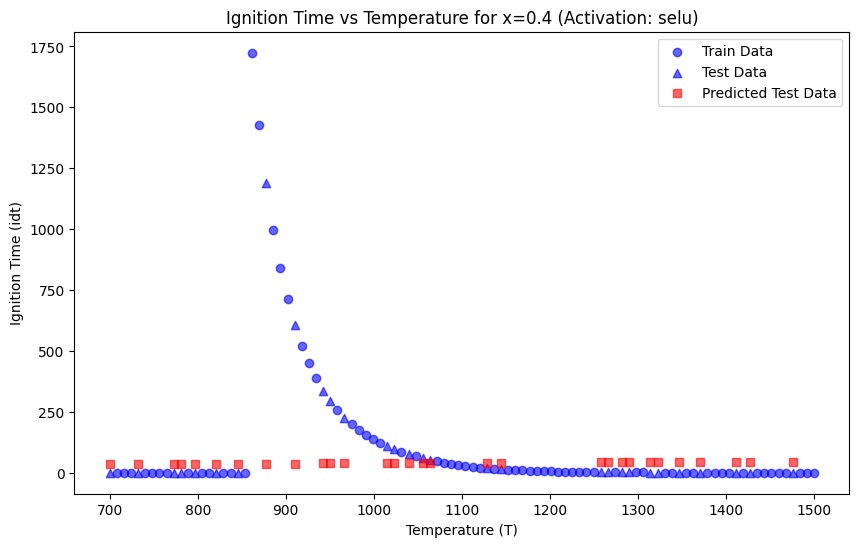

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Results for x=0.4 with activation=softplus:
      x    y  phi          T   Actual idt  Predicted idt   Difference
0   0.4  0.6  0.5  1370.7070     0.372607      61.791374   -61.418767
1   0.4  0.6  0.5  1128.2830    18.768660      52.336006   -33.567346
2   0.4  0.6  0.5  1265.6570     1.889880      57.680817   -55.790937
3   0.4  0.6  0.5  1063.6360    52.229430      49.836155     2.393275
4   0.4  0.6  0.5  1055.5560    59.052790      49.524570     9.528220
5   0.4  0.6  0.5  1015.1520   108.036500      47.969402    60.067098
6   0.4  0.6  0.5   877.7778  1189.149000      42.728302  1146.420698
7   0.4  0.6  0.5  1346.4650     0.530350      60.841309   -60.310959
8   0.4  0.6  0.5   780.8081     0.000000      39.087185   -39.087185
9   0.4  0.6  0.5   700.0000     0.000000      36.106556   -36.106556
10  0.4  0.6  0.5   845.4545     0.000000      41.508141   -41.508141
11  0.4  0.6  0.5   942.4242   337.401800      45.184654   292.217146
12  0.4 

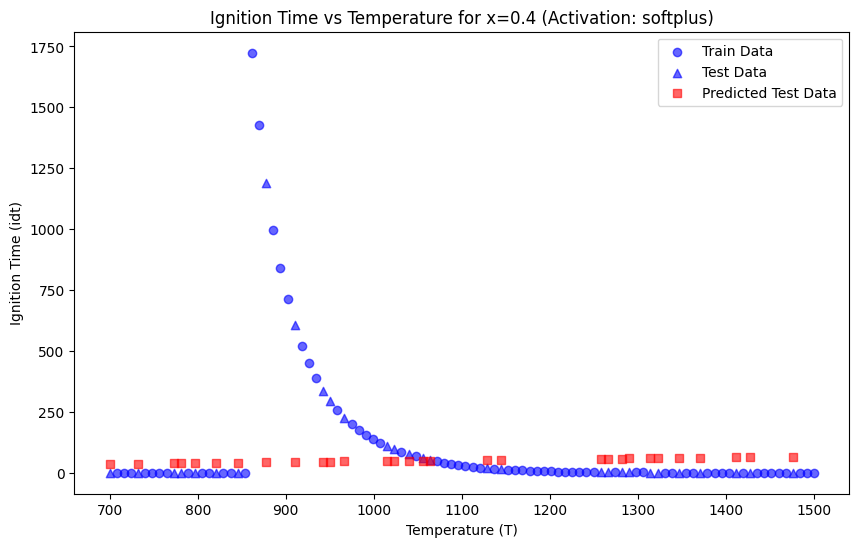

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Results for x=0.4 with activation=swish:
      x    y  phi          T   Actual idt  Predicted idt   Difference
0   0.4  0.6  0.5  1370.7070     0.372607      51.152767   -50.780160
1   0.4  0.6  0.5  1128.2830    18.768660      42.475140   -23.706480
2   0.4  0.6  0.5  1265.6570     1.889880      47.389854   -45.499974
3   0.4  0.6  0.5  1063.6360    52.229430      40.165348    12.064082
4   0.4  0.6  0.5  1055.5560    59.052790      39.876774    19.176016
5   0.4  0.6  0.5  1015.1520   108.036500      38.434582    69.601918
6   0.4  0.6  0.5   877.7778  1189.149000      33.540100  1155.608900
7   0.4  0.6  0.5  1346.4650     0.530350      50.284061   -49.753711
8   0.4  0.6  0.5   780.8081     0.000000      30.096653   -30.096653
9   0.4  0.6  0.5   700.0000     0.000000      27.237598   -27.237598
10  0.4  0.6  0.5   845.4545     0.000000      32.391010   -32.391010
11  0.4  0.6  0.5   942.4242   337.401800      35.841412   301.560388
12  0.4  0.

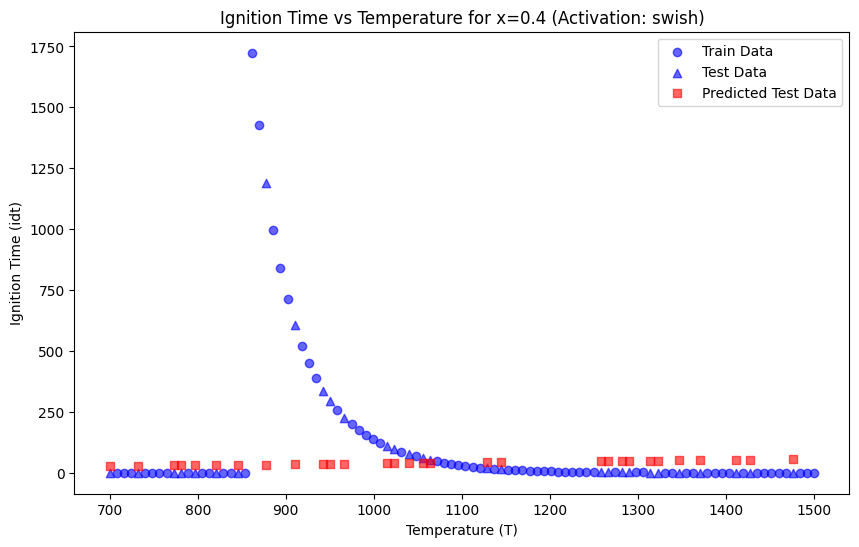

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Results for x=0.4 with activation=gelu:
      x    y  phi          T   Actual idt  Predicted idt   Difference
0   0.4  0.6  0.5  1370.7070     0.372607      55.092968   -54.720361
1   0.4  0.6  0.5  1128.2830    18.768660      45.542904   -26.774244
2   0.4  0.6  0.5  1265.6570     1.889880      50.953274   -49.063394
3   0.4  0.6  0.5  1063.6360    52.229430      42.998409     9.231021
4   0.4  0.6  0.5  1055.5560    59.052790      42.680466    16.372324
5   0.4  0.6  0.5  1015.1520   108.036500      41.090927    66.945573
6   0.4  0.6  0.5   877.7778  1189.149000      35.691216  1153.457784
7   0.4  0.6  0.5  1346.4650     0.530350      54.137512   -53.607162
8   0.4  0.6  0.5   780.8081     0.000000      31.885674   -31.885674
9   0.4  0.6  0.5   700.0000     0.000000      28.719894   -28.719894
10  0.4  0.6  0.5   845.4545     0.000000      34.422035   -34.422035
11  0.4  0.6  0.5   942.4242   337.401800      38.231205   299.170595
12  0.4  0.6

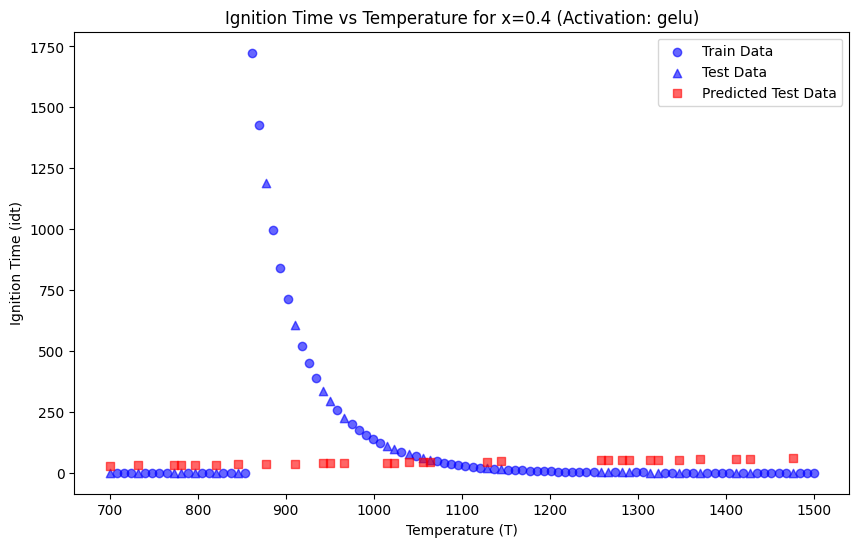

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Results for x=0.6 with activation=relu:
      x    y  phi          T   Actual idt  Predicted idt   Difference
0   0.6  0.4  0.5  1370.7070     0.425193      45.742825   -45.317632
1   0.6  0.4  0.5  1128.2830    22.133240      38.657928   -16.524688
2   0.6  0.4  0.5  1265.6570     2.141814      42.661182   -40.519368
3   0.6  0.4  0.5  1063.6360    63.713470      36.787525    26.925945
4   0.6  0.4  0.5  1055.5560    72.289210      36.554482    35.734728
5   0.6  0.4  0.5  1015.1520   133.610000      35.391804    98.218196
6   0.6  0.4  0.5   877.7778  1385.447000      31.479425  1353.967575
7   0.6  0.4  0.5  1346.4650     0.602980      45.030384   -44.427404
8   0.6  0.4  0.5   780.8081     0.000000      28.768953   -28.768953
9   0.6  0.4  0.5   700.0000     0.000000      26.557165   -26.557165
10  0.6  0.4  0.5   845.4545     0.000000      30.570276   -30.570276
11  0.6  0.4  0.5   942.4242   408.965100      33.311756   375.653344
12  0.6  0.4

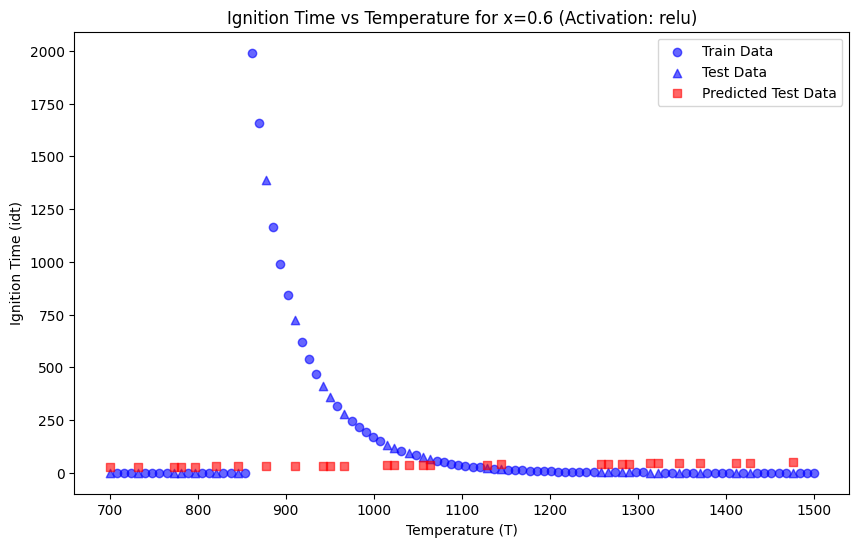

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Results for x=0.6 with activation=leaky_relu:
      x    y  phi          T   Actual idt  Predicted idt   Difference
0   0.6  0.4  0.5  1370.7070     0.425193      36.074745   -35.649552
1   0.6  0.4  0.5  1128.2830    22.133240      31.635609    -9.502369
2   0.6  0.4  0.5  1265.6570     2.141814      34.129631   -31.987817
3   0.6  0.4  0.5  1063.6360    63.713470      30.487072    33.226398
4   0.6  0.4  0.5  1055.5560    72.289210      30.344929    41.944281
5   0.6  0.4  0.5  1015.1520   133.610000      29.638897   103.971103
6   0.6  0.4  0.5   877.7778  1385.447000      27.314281  1358.132719
7   0.6  0.4  0.5  1346.4650     0.602980      35.623466   -35.020486
8   0.6  0.4  0.5   780.8081     0.000000      25.768772   -25.768772
9   0.6  0.4  0.5   700.0000     0.000000      24.568329   -24.568329
10  0.6  0.4  0.5   845.4545     0.000000      26.788536   -26.788536
11  0.6  0.4  0.5   942.4242   408.965100      28.391838   380.573262
12  0.

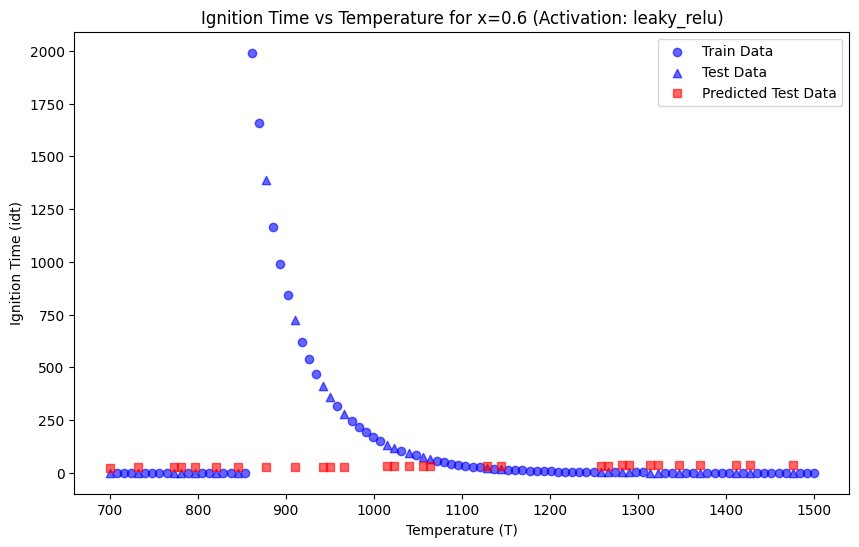

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Results for x=0.6 with activation=elu:
      x    y  phi          T   Actual idt  Predicted idt   Difference
0   0.6  0.4  0.5  1370.7070     0.425193      42.453129   -42.027936
1   0.6  0.4  0.5  1128.2830    22.133240      37.971611   -15.838371
2   0.6  0.4  0.5  1265.6570     2.141814      40.487629   -38.345815
3   0.6  0.4  0.5  1063.6360    63.713470      36.814964    26.898506
4   0.6  0.4  0.5  1055.5560    72.289210      36.671867    35.617343
5   0.6  0.4  0.5  1015.1520   133.610000      35.961823    97.648177
6   0.6  0.4  0.5   877.7778  1385.447000      33.630386  1351.816614
7   0.6  0.4  0.5  1346.4650     0.602980      41.996861   -41.393881
8   0.6  0.4  0.5   780.8081     0.000000      32.088699   -32.088699
9   0.6  0.4  0.5   700.0000     0.000000      30.899273   -30.899273
10  0.6  0.4  0.5   845.4545     0.000000      33.104977   -33.104977
11  0.6  0.4  0.5   942.4242   408.965100      34.709679   374.255421
12  0.6  0.4 

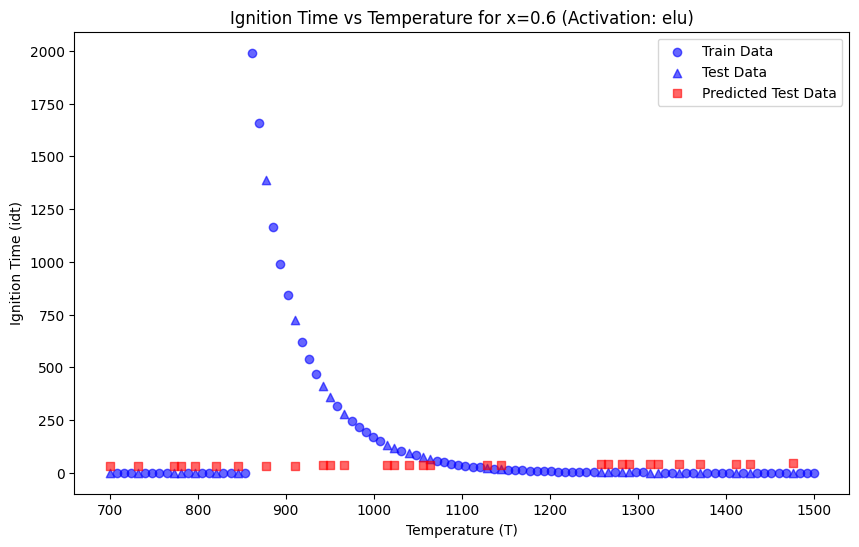

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Results for x=0.6 with activation=selu:
      x    y  phi          T   Actual idt  Predicted idt   Difference
0   0.6  0.4  0.5  1370.7070     0.425193      48.742725   -48.317532
1   0.6  0.4  0.5  1128.2830    22.133240      41.867550   -19.734310
2   0.6  0.4  0.5  1265.6570     2.141814      45.761677   -43.619863
3   0.6  0.4  0.5  1063.6360    63.713470      40.037136    23.676334
4   0.6  0.4  0.5  1055.5560    72.289210      39.808483    32.480727
5   0.6  0.4  0.5  1015.1520   133.610000      38.665462    94.944538
6   0.6  0.4  0.5   877.7778  1385.447000      34.785435  1350.661565
7   0.6  0.4  0.5  1346.4650     0.602980      48.054569   -47.451589
8   0.6  0.4  0.5   780.8081     0.000000      32.054554   -32.054554
9   0.6  0.4  0.5   700.0000     0.000000      29.786106   -29.786106
10  0.6  0.4  0.5   845.4545     0.000000      33.874264   -33.874264
11  0.6  0.4  0.5   942.4242   408.965100      36.609951   372.355149
12  0.6  0.4

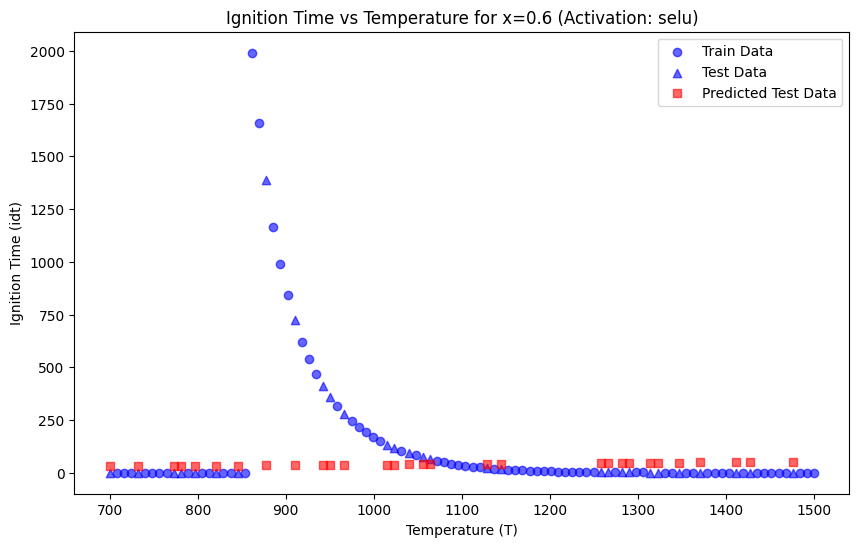

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Results for x=0.6 with activation=softplus:
      x    y  phi          T   Actual idt  Predicted idt   Difference
0   0.6  0.4  0.5  1370.7070     0.425193      51.605713   -51.180520
1   0.6  0.4  0.5  1128.2830    22.133240      42.940174   -20.806934
2   0.6  0.4  0.5  1265.6570     2.141814      47.848415   -45.706601
3   0.6  0.4  0.5  1063.6360    63.713470      40.633041    23.080429
4   0.6  0.4  0.5  1055.5560    72.289210      40.344830    31.944380
5   0.6  0.4  0.5  1015.1520   133.610000      38.904106    94.705894
6   0.6  0.4  0.5   877.7778  1385.447000      34.013588  1351.433412
7   0.6  0.4  0.5  1346.4650     0.602980      50.738403   -50.135423
8   0.6  0.4  0.5   780.8081     0.000000      30.571459   -30.571459
9   0.6  0.4  0.5   700.0000     0.000000      27.712179   -27.712179
10  0.6  0.4  0.5   845.4545     0.000000      32.865112   -32.865112
11  0.6  0.4  0.5   942.4242   408.965100      36.313290   372.651810
12  0.6 

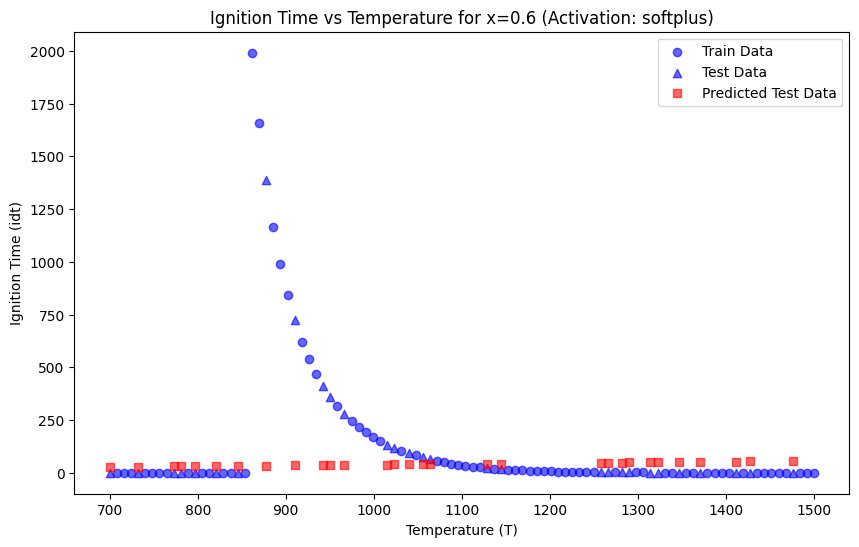

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Results for x=0.6 with activation=swish:
      x    y  phi          T   Actual idt  Predicted idt   Difference
0   0.6  0.4  0.5  1370.7070     0.425193      48.225288   -47.800095
1   0.6  0.4  0.5  1128.2830    22.133240      40.268372   -18.135132
2   0.6  0.4  0.5  1265.6570     2.141814      44.773304   -42.631490
3   0.6  0.4  0.5  1063.6360    63.713470      38.153084    25.560386
4   0.6  0.4  0.5  1055.5560    72.289210      37.888966    34.400244
5   0.6  0.4  0.5  1015.1520   133.610000      36.569118    97.040882
6   0.6  0.4  0.5   877.7778  1385.447000      32.095863  1353.351137
7   0.6  0.4  0.5  1346.4650     0.602980      47.428226   -46.825246
8   0.6  0.4  0.5   780.8081     0.000000      28.956305   -28.956305
9   0.6  0.4  0.5   700.0000     0.000000      26.356934   -26.356934
10  0.6  0.4  0.5   845.4545     0.000000      31.047340   -31.047340
11  0.6  0.4  0.5   942.4242   408.965100      34.197845   374.767255
12  0.6  0.

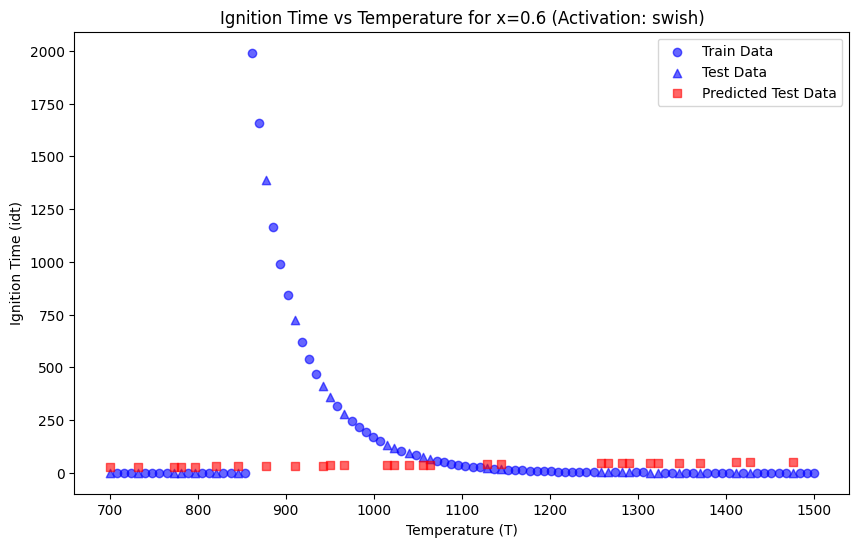

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Results for x=0.6 with activation=gelu:
      x    y  phi          T   Actual idt  Predicted idt   Difference
0   0.6  0.4  0.5  1370.7070     0.425193      48.316822   -47.891629
1   0.6  0.4  0.5  1128.2830    22.133240      40.723160   -18.589920
2   0.6  0.4  0.5  1265.6570     2.141814      45.016277   -42.874463
3   0.6  0.4  0.5  1063.6360    63.713470      38.714443    24.999027
4   0.6  0.4  0.5  1055.5560    72.289210      38.464024    33.825186
5   0.6  0.4  0.5  1015.1520   133.610000      37.214031    96.395969
6   0.6  0.4  0.5   877.7778  1385.447000      32.999142  1352.447858
7   0.6  0.4  0.5  1346.4650     0.602980      47.554039   -46.951059
8   0.6  0.4  0.5   780.8081     0.000000      30.068016   -30.068016
9   0.6  0.4  0.5   700.0000     0.000000      27.665810   -27.665810
10  0.6  0.4  0.5   845.4545     0.000000      32.017227   -32.017227
11  0.6  0.4  0.5   942.4242   408.965100      34.975063   373.990037
12  0.6  0.4

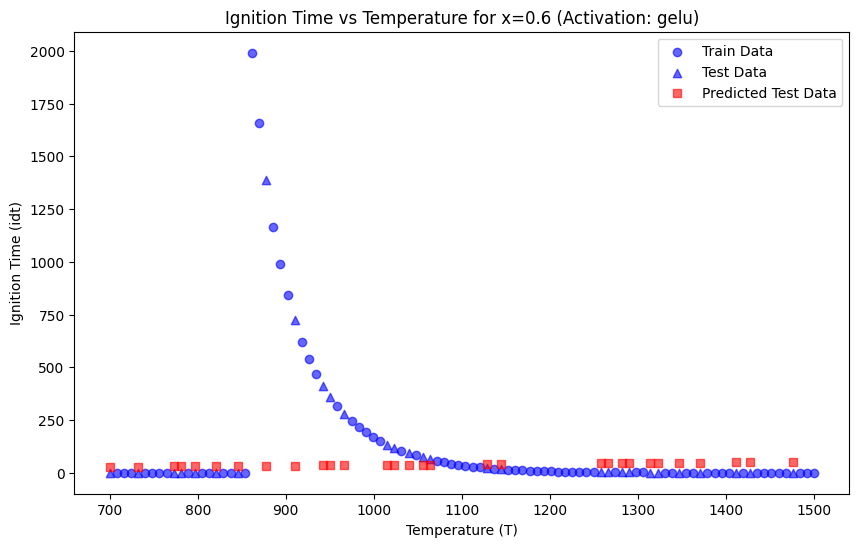

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Results for x=0.8 with activation=relu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5  1370.7070    0.000607      74.113892  -74.113284
1   0.8  0.2  0.5  1128.2830    0.031696      62.146030  -62.114334
2   0.8  0.2  0.5  1265.6570    0.002983      68.916756  -68.913772
3   0.8  0.2  0.5  1063.6360    0.095711      58.972710  -58.876999
4   0.8  0.2  0.5  1055.5560    0.109249      58.576778  -58.467530
5   0.8  0.2  0.5  1015.1520    0.206432      56.599503  -56.393070
6   0.8  0.2  0.5   877.7778    0.000000      49.915813  -49.915813
7   0.8  0.2  0.5  1346.4650    0.000855      72.913277  -72.912421
8   0.8  0.2  0.5   780.8081    0.000000      45.246975  -45.246975
9   0.8  0.2  0.5   700.0000    0.000000      41.401230  -41.401230
10  0.8  0.2  0.5   845.4545    0.000000      48.354137  -48.354137
11  0.8  0.2  0.5   942.4242    0.614210      53.052666  -52.438455
12  0.8  0.2  0.5  1289.8990    0.002

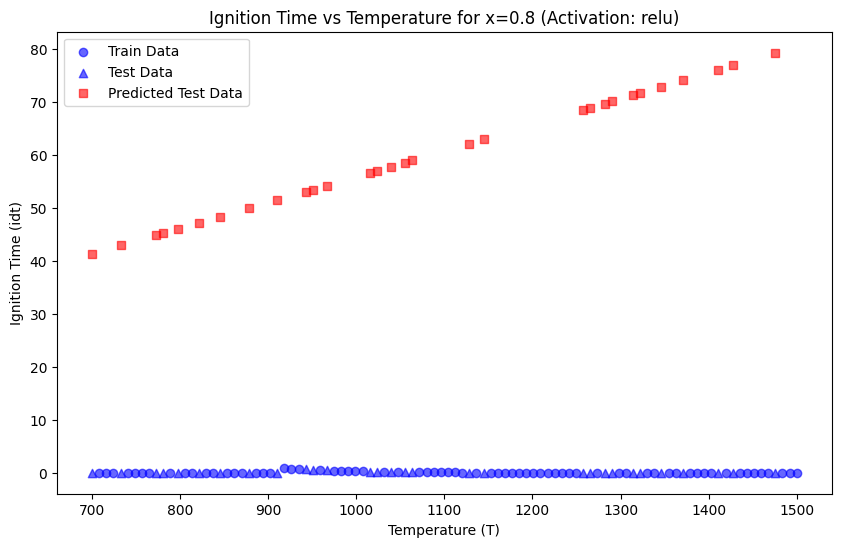

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Results for x=0.8 with activation=leaky_relu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5  1370.7070    0.000607      70.611183  -70.610576
1   0.8  0.2  0.5  1128.2830    0.031696      60.743671  -60.711975
2   0.8  0.2  0.5  1265.6570    0.002983      66.309090  -66.306106
3   0.8  0.2  0.5  1063.6360    0.095711      58.155201  -58.059490
4   0.8  0.2  0.5  1055.5560    0.109249      57.833355  -57.724106
5   0.8  0.2  0.5  1015.1520    0.206432      56.229939  -56.023506
6   0.8  0.2  0.5   877.7778    0.000000      50.870602  -50.870602
7   0.8  0.2  0.5  1346.4650    0.000855      69.615440  -69.614585
8   0.8  0.2  0.5   780.8081    0.000000      47.203625  -47.203625
9   0.8  0.2  0.5   700.0000    0.000000      44.254292  -44.254292
10  0.8  0.2  0.5   845.4545    0.000000      49.635426  -49.635426
11  0.8  0.2  0.5   942.4242    0.614210      53.372707  -52.758497
12  0.8  0.2  0.5  1289.8990    

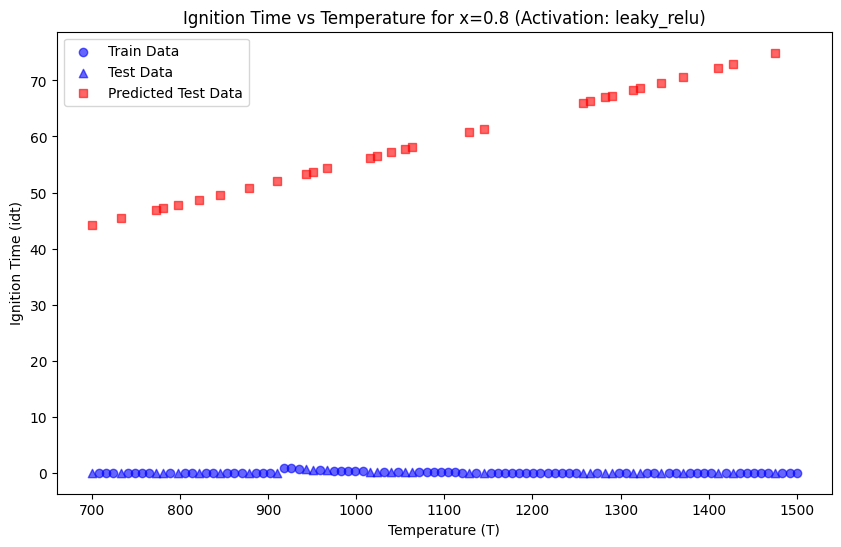

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Results for x=0.8 with activation=elu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5  1370.7070    0.000607      75.632736  -75.632129
1   0.8  0.2  0.5  1128.2830    0.031696      64.406143  -64.374447
2   0.8  0.2  0.5  1265.6570    0.002983      70.758621  -70.755638
3   0.8  0.2  0.5  1063.6360    0.095711      61.427547  -61.331837
4   0.8  0.2  0.5  1055.5560    0.109249      61.055862  -60.946614
5   0.8  0.2  0.5  1015.1520    0.206432      59.199341  -58.992909
6   0.8  0.2  0.5   877.7778    0.000000      52.919861  -52.919861
7   0.8  0.2  0.5  1346.4650    0.000855      74.506905  -74.506049
8   0.8  0.2  0.5   780.8081    0.000000      48.528442  -48.528442
9   0.8  0.2  0.5   700.0000    0.000000      44.906620  -44.906620
10  0.8  0.2  0.5   845.4545    0.000000      51.451515  -51.451515
11  0.8  0.2  0.5   942.4242    0.614210      55.867844  -55.253633
12  0.8  0.2  0.5  1289.8990    0.00202

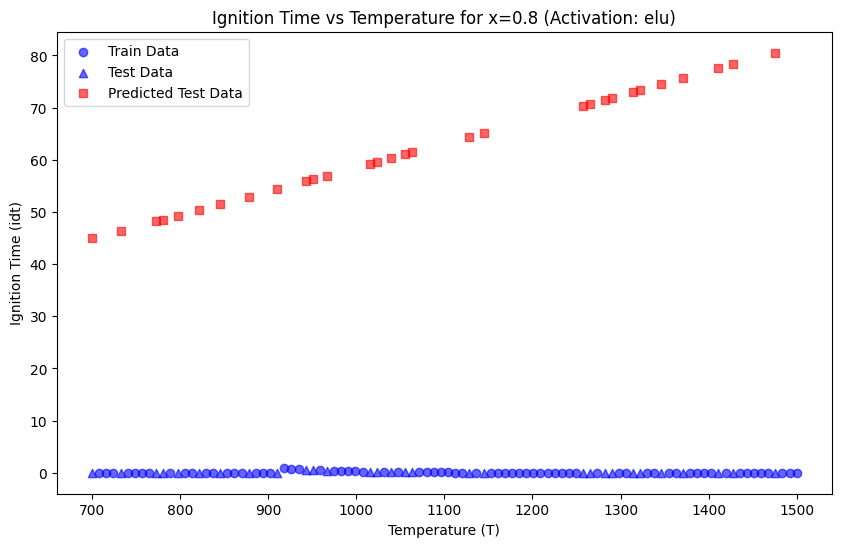

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Results for x=0.8 with activation=selu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5  1370.7070    0.000607      67.196381  -67.195774
1   0.8  0.2  0.5  1128.2830    0.031696      58.227097  -58.195401
2   0.8  0.2  0.5  1265.6570    0.002983      63.306595  -63.303611
3   0.8  0.2  0.5  1063.6360    0.095711      55.840332  -55.744621
4   0.8  0.2  0.5  1055.5560    0.109249      55.542221  -55.432972
5   0.8  0.2  0.5  1015.1520    0.206432      54.052200  -53.845768
6   0.8  0.2  0.5   877.7778    0.000000      48.997002  -48.997002
7   0.8  0.2  0.5  1346.4650    0.000855      66.298393  -66.297538
8   0.8  0.2  0.5   780.8081    0.000000      45.442284  -45.442284
9   0.8  0.2  0.5   700.0000    0.000000      42.492485  -42.492485
10  0.8  0.2  0.5   845.4545    0.000000      47.810585  -47.810585
11  0.8  0.2  0.5   942.4242    0.614210      51.373566  -50.759355
12  0.8  0.2  0.5  1289.8990    0.0020

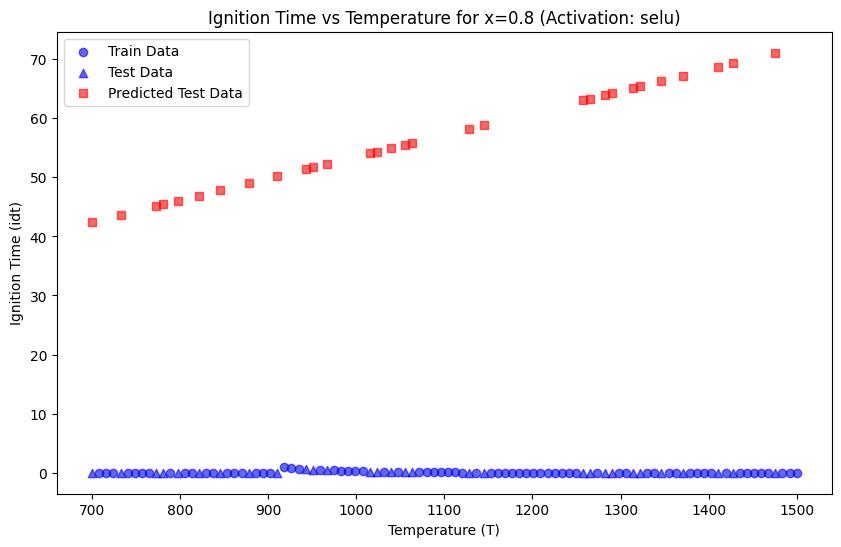

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Results for x=0.8 with activation=softplus:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5  1370.7070    0.000607      65.334297  -65.333690
1   0.8  0.2  0.5  1128.2830    0.031696      55.284271  -55.252575
2   0.8  0.2  0.5  1265.6570    0.002983      60.966351  -60.963367
3   0.8  0.2  0.5  1063.6360    0.095711      52.625458  -52.529747
4   0.8  0.2  0.5  1055.5560    0.109249      52.293941  -52.184693
5   0.8  0.2  0.5  1015.1520    0.206432      50.639256  -50.432823
6   0.8  0.2  0.5   877.7778    0.000000      45.058830  -45.058830
7   0.8  0.2  0.5  1346.4650    0.000855      64.324837  -64.323982
8   0.8  0.2  0.5   780.8081    0.000000      41.176533  -41.176533
9   0.8  0.2  0.5   700.0000    0.000000      37.992096  -37.992096
10  0.8  0.2  0.5   845.4545    0.000000      43.758480  -43.758480
11  0.8  0.2  0.5   942.4242    0.614210      47.675083  -47.060873
12  0.8  0.2  0.5  1289.8990    0.

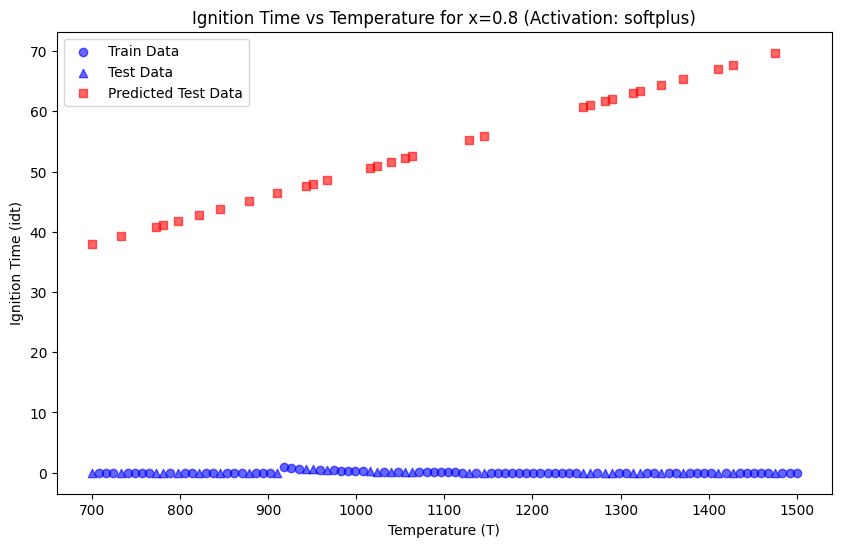

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Results for x=0.8 with activation=swish:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5  1370.7070    0.000607      74.546669  -74.546062
1   0.8  0.2  0.5  1128.2830    0.031696      62.816017  -62.784321
2   0.8  0.2  0.5  1265.6570    0.002983      69.450195  -69.447212
3   0.8  0.2  0.5  1063.6360    0.095711      59.709480  -59.613770
4   0.8  0.2  0.5  1055.5560    0.109249      59.322002  -59.212754
5   0.8  0.2  0.5  1015.1520    0.206432      57.387630  -57.181198
6   0.8  0.2  0.5   877.7778    0.000000      50.857304  -50.857304
7   0.8  0.2  0.5  1346.4650    0.000855      73.369064  -73.368209
8   0.8  0.2  0.5   780.8081    0.000000      46.306198  -46.306198
9   0.8  0.2  0.5   700.0000    0.000000      42.567314  -42.567314
10  0.8  0.2  0.5   845.4545    0.000000      49.333813  -49.333813
11  0.8  0.2  0.5   942.4242    0.614210      53.920345  -53.306135
12  0.8  0.2  0.5  1289.8990    0.002

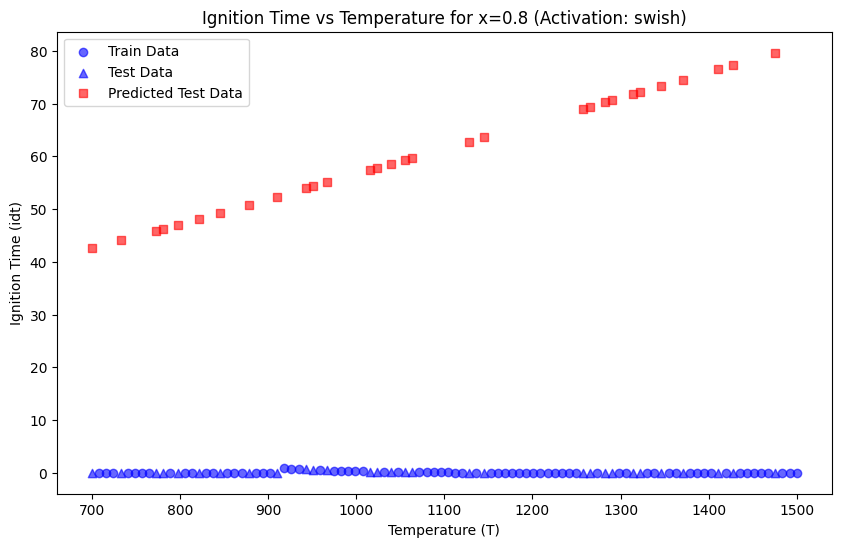

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Results for x=0.8 with activation=gelu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5  1370.7070    0.000607      73.649406  -73.648799
1   0.8  0.2  0.5  1128.2830    0.031696      61.758316  -61.726620
2   0.8  0.2  0.5  1265.6570    0.002983      68.485550  -68.482566
3   0.8  0.2  0.5  1063.6360    0.095711      58.605476  -58.509766
4   0.8  0.2  0.5  1055.5560    0.109249      58.212116  -58.102868
5   0.8  0.2  0.5  1015.1520    0.206432      56.247650  -56.041218
6   0.8  0.2  0.5   877.7778    0.000000      49.607475  -49.607475
7   0.8  0.2  0.5  1346.4650    0.000855      72.456505  -72.455650
8   0.8  0.2  0.5   780.8081    0.000000      44.969410  -44.969410
9   0.8  0.2  0.5   700.0000    0.000000      41.149326  -41.149326
10  0.8  0.2  0.5   845.4545    0.000000      48.056046  -48.056046
11  0.8  0.2  0.5   942.4242    0.614210      52.723854  -52.109644
12  0.8  0.2  0.5  1289.8990    0.002

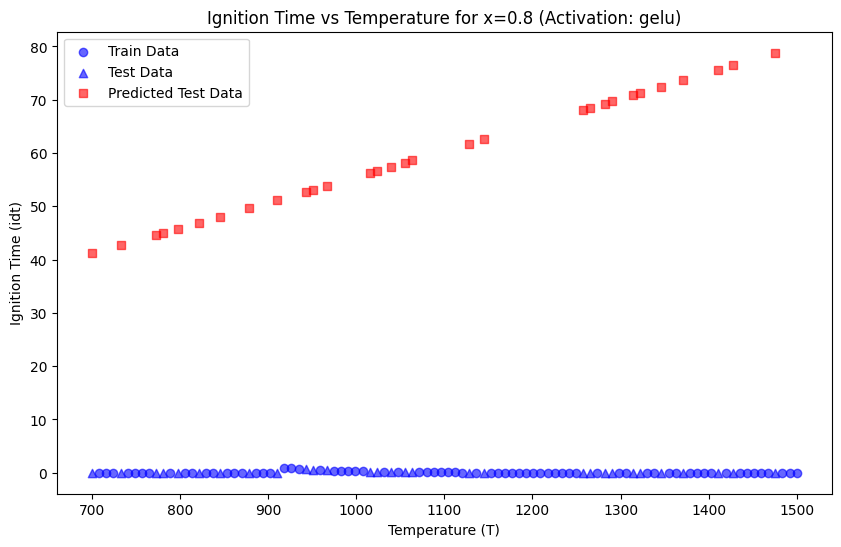

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Define the function to isolate specific x values and process the model training, testing, and visualization
def process_for_x_value(df, x_value, activation):
    # Step 1: Filter the data where x equals the specified value
    df_x_value = df[df['x'] == x_value]

    # Split 70% of data with x = x_value into training and 30% into testing
    train_x, test_x = train_test_split(df_x_value, test_size=0.3, random_state=42)

    # Combine training data for x=x_value with the rest of the dataset where x != x_value
    train_df = pd.concat([df[df['x'] != x_value], train_x])
    test_df = test_x

    # Separate features and target
    X_train = train_df.drop(columns=['idt']).values
    y_train = train_df['idt'].values
    X_test = test_df.drop(columns=['idt']).values
    y_test = test_df['idt'].values

    # Step 2: Define and train the model
    model_tf = Sequential([
        Dense(16, input_shape=(6,), activation=activation),
        Dense(8, activation=activation),
        Dense(1)  # Output layer
    ])

    model_tf.compile(optimizer='adam', loss='mse')
    model_tf.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=0)

    # Predict `idt` values for the test set
    test_predictions = model_tf.predict(X_test).flatten()

    # Calculate differences
    differences = y_test - test_predictions

    # Display results in a DataFrame
    comparison_df = pd.DataFrame({
        'x': test_df['x'].values,
        'y': test_df['y'].values,
        'phi': test_df['phi'].values,
        'T': test_df['T'].values,
        'Actual idt': y_test,
        'Predicted idt': test_predictions,
        'Difference': differences
    })

    # Print the comparison DataFrame
    print(f"Results for x={x_value} with activation={activation}:")
    print(comparison_df)

    # Step 3: Plot the results
    T_train = train_x['T'].values
    idt_train = train_x['idt'].values
    T_test = test_df['T'].values
    idt_test = y_test

    plt.figure(figsize=(10, 6))
    plt.scatter(T_train, idt_train, color='blue', marker='o', label='Train Data', alpha=0.6)
    plt.scatter(T_test, idt_test, color='blue', marker='^', label='Test Data', alpha=0.6)
    plt.scatter(T_test, test_predictions, color='red', marker='s', label='Predicted Test Data', alpha=0.6)

    plt.xlabel('Temperature (T)')
    plt.ylabel('Ignition Time (idt)')
    plt.title(f'Ignition Time vs Temperature for x={x_value} (Activation: {activation})')
    plt.legend()
    plt.show()

# List of x values to process and example activation functions
x_values_to_process = [0.2, 0.4, 0.6, 0.8]
activation_functions = ['relu', 'leaky_relu', 'elu', 'selu', 'softplus', 'swish', 'gelu']

# Example of running the process for each specified x value with a chosen activation
for x_value in x_values_to_process:
    for activation in activation_functions:
        process_for_x_value(df, x_value, activation)  # Change 'elu' to try different activation functions


I seem to be getting only straight lines for predictions. This is not good at all.